#### Information Retrieval
##### Assignment 1
###### Group 36

1. Ankit Dixit    2022aa05328
2. Shelly Chauhan 2022aa05034
3. Swarnendu Dawn 2021sc04401

###### Dataset used
https://www.kaggle.com/datasets/team-ai/spam-text-message-classification to an external site.
<br/>
<span style="color: red;">
<b>Question 1 (1 Marks):</b>
</span>
Collect the dataset and Import the necessary Python libraries for text classification and dataset. Provide the code for importing these libraries.


<span style="color: blue;">Note: first 3 steps are optional, you can directly execute the code from 3rd step after downloading the csv file locally</span>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d team-ai/spam-text-message-classification

spam-text-message-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('spam-text-message-classification.zip' , 'r')
zip_ref.extractall()
zip_ref.close()

In [4]:
#Importing all the required libraries
import pandas as pd
import nltk
import re
import glob
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from nltk.tokenize import sent_tokenize,word_tokenize
import string
nltk.download('punkt')

# Download the NLTK stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer,PorterStemmer
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag

from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn import model_selection, naive_bayes, svm
import seaborn as sns
import numpy as np
import spacy

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
#from sklearn.svm import SVM

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score, cross_val_predict,cross_val_predict, KFold, StratifiedKFold, GroupKFold,\
RepeatedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score,\
mean_squared_error,mean_absolute_error, f1_score, precision_score, recall_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [5]:
df = pd.read_csv('SPAM text message 20170820 - Data.csv', delimiter=',')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


**
<span style="color: red;">
<b>Question 2 (2 Marks):

Explain the importance of text preprocessing in text classification and demonstrate Python code for tasks such as lowercasing and removing special characters.</b></span>
**
<br/>
<span style="color: blue;">
Text preprocessing is a crucial step as we remove stopwords, punctuations before classify the text. Classifcation into categories is independent of redudent words.
Methods are explained below.<br/>
Removal of stopwords is necessary because they are present in every file and does not hold significant importance.
Similary, punctuation itself doesn't hold any contextual meaning.
And we lowered the words as it will help in creating meaningful vocabulary. Words like Car, car, CAR, cAR are basically same words.
</span>


In [7]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


--------------------------------------------------
Total types of Categories in the dataset:
ham     4825
spam     747
Name: Category, dtype: int64
--------------------------------------------------
Null values check:
Category    0
Message     0
dtype: int64
--------------------------------------------------


<Axes: xlabel='Category', ylabel='count'>

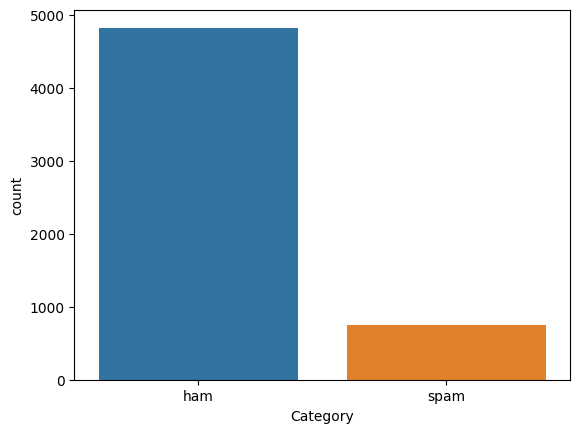

In [8]:
print("-"*50)
print("Total types of Categories in the dataset:")
print(df['Category'].value_counts())
print("-"*50)
print("Null values check:")
print(df.isna().sum())
print("-"*50)
sns.countplot(x="Category", data=df)


<span style="color: red;">Question 3 (2 Marks):</span>

a) Write Python code to load a text dataset for classification</br>
b) Preprocess the text data by tokenizing and applying stemming or lemmatization. Provide Python code for these steps.

<span style="color: blue;">a) We loaded the data from file into pandas dataframe type in above step while answering to question 1 using pandas read_csv method
</span>

b) preprocessing on the text

<span style="color: blue;">
    <b>doPreprocessing</b> : We are first creating the tokens of sentences. Then, tokenizing the words in a sentence. <br/>
    <b>doRemoveStopWords</b> : Remove the stop words from the message tokens as they doesn't hold any meaning because of their redundancy.<br/>
    <b>doLemmatization</b> : Performs lemmatization operation on the tokens to get their base form<br/>
</span>
Before operations lets take a look at top 10 Messages in the dataset

In [9]:
df['Message']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [10]:
# Also convert mixed case letters to lower
def doPreprocessing(sentence):
    sents = sent_tokenize(sentence)
    for sentence in sents:
        words = word_tokenize(sentence)
        words = [''.join([i if i in string.printable else '' for i in word]) for word in words]
        words = [word for word in words if len(word) > 0 and word[0].isalpha()]
        words = [w for w in words if not w in string.punctuation]
        words = [w.lower() for w in words]
    return words

df["Message"]=df["Message"].apply(doPreprocessing)


#Stopwords removal (not used)
def doRemoveStopWords(sentence):
    english_stop_words=set(stopwords.words("english"))
    keywords=[w for w in sentence if not w in english_stop_words]
    return keywords

df["Message"]=df["Message"].apply(doRemoveStopWords)

#lemmatization (not used)
def doLemmatization(sentence):
    wordnet_lemmatizer = WordNetLemmatizer()
    keywords=[wordnet_lemmatizer.lemmatize(w) for w in sentence]
    return keywords

df["Message"]=df["Message"].apply(doLemmatization)

<span style="color: blue;">After Lemmatization, lets now take a look at the Messages</span>

In [11]:
df['Message']

0       [available, bugis, n, great, world, la, e, buf...
1                                   [joking, wif, u, oni]
2       [text, fa, receive, entry, question, std, txt,...
3           [u, dun, say, early, hor, u, c, already, say]
4        [nah, n't, think, go, usf, life, around, though]
                              ...                        
5567                                   [bt-national-rate]
5568                      [b, going, esplanade, fr, home]
5569                                         [suggestion]
5570    [guy, bitching, acted, like, interested, buyin...
5571                                         [true, name]
Name: Message, Length: 5572, dtype: object

In [12]:
mgs_category_class = {"ham":0,"spam":1}
df['preprocessed_msg'] = df["Message"]
df["preprocessed_msg"] = df["preprocessed_msg"].map(" ".join)
df['preprocessed_msg']


0       available bugis n great world la e buffet cine...
1                                        joking wif u oni
2       text fa receive entry question std txt rate c ...
3                     u dun say early hor u c already say
4                 nah n't think go usf life around though
                              ...                        
5567                                     bt-national-rate
5568                            b going esplanade fr home
5569                                           suggestion
5570    guy bitching acted like interested buying some...
5571                                            true name
Name: preprocessed_msg, Length: 5572, dtype: object

In [13]:
df

,Category,Message,preprocessed_msg
0,ham,"[available, bugis, n, great, world, la, e, buf...",available bugis n great world la e buffet cine...
1,ham,"[joking, wif, u, oni]",joking wif u oni
2,spam,"[text, fa, receive, entry, question, std, txt,...",text fa receive entry question std txt rate c ...
3,ham,"[u, dun, say, early, hor, u, c, already, say]",u dun say early hor u c already say
4,ham,"[nah, n't, think, go, usf, life, around, though]",nah n't think go usf life around though
...,...,...,...
5567,spam,[bt-national-rate],bt-national-rate
5568,ham,"[b, going, esplanade, fr, home]",b going esplanade fr home
5569,ham,[suggestion],suggestion
5570,ham,"[guy, bitching, acted, like, interested, buyin...",guy bitching acted like interested buying some...


<span style="color: red;">
Question 4 (1 Marks):</span>

Split/Assign the dataset into training and testing sets using Python.

<span style="color: blue;">
    Splitting the data in 80/20 ratio for training and testing
    </span>

In [14]:
labels = df["Category"]
data = df["preprocessed_msg"]
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=38, shuffle = True)

<span style="color: red;">
Question 5 (3 Marks):
</span>

a) Implement a text classification model (e.g., Naive Bayes or SVM) using Python's machine learning libraries.<br/>
b) Train the model on the training dataset and evaluate its performance on the testing dataset. Include code for both training and evaluation.

<span style="color: blue;">
    Here, we are implementing Naive Bayes model for classification
    </span>

In [15]:

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features = 2000)),
    ('svm_classifier', naive_bayes.MultinomialNB())
])

In [16]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


In [17]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9542600896860987


<span style="color: red;">
    Question 6 (2 Marks):
</span>
Using Python code, calculate important metrics like accuracy, precision, recall, and F1-score for the text classification model's performance on the testing dataset.



In [18]:
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Naive Bayes Accuracy acore: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("-"*80)
print(classification_report(y_test, y_pred))

Naive Bayes Accuracy acore: 0.9542600896860987
Precision: 0.9751703992210321
Recall: 0.8165467625899281
F1 Score: 0.8749342945933523
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       976
        spam       1.00      0.63      0.78       139

    accuracy                           0.95      1115
   macro avg       0.98      0.82      0.87      1115
weighted avg       0.96      0.95      0.95      1115



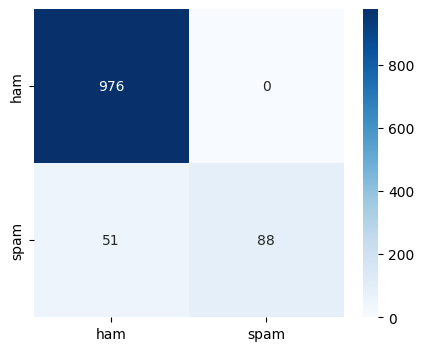

In [19]:
def plot_confusion_matrix(y_test, y_pred):
    confusion_mtx = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    c = sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
    c.set(xticklabels=mgs_category_class, yticklabels=mgs_category_class)

plot_confusion_matrix(y_test, y_pred)

<span style="color: red;">
Question 7 (2 Marks):
</span>

Implement a method for feature selection or feature extraction in text classification. Provide Python code for this step and explain its significance.



<span style="color: blue;">Dimensionality reduction is generally performed when high dimensional data like text are classified. This can be done either by using feature extraction techniques or by using feature selection techniques</span>

<span style="color: blue;">Features extraction techniques to convert text into a matrix(or vector) of features. Some of the most popular methods of feature extraction are:<br/>
    1. Bag-of-Words: This can be used to extract the frequently used words.<br/>
    2. TF-IDF: it has a parameter of max_features which is used to control the no. of dimensions basically.
    
</span>

<b>In our code we have used TF-IDF feature extraction technique which is clearly part of our pipeline and can be seen in answer to question 5 and the max features to be created has been limited to 2000</b>

<span style="color: red;">
Question 8 (2 Marks):
</span>

Implement k-fold cross-validation in Python for the given dataset and classifier.

In [22]:


Naive = naive_bayes.MultinomialNB()
Encoder = LabelEncoder()
n = 10
x_train, x_test, y_train, y_test = train_test_split(df['preprocessed_msg'], df['Category'], test_size=0.1, random_state=None)
folds = KFold(n_splits = n, shuffle = True, random_state = 38)

Train_Y = Encoder.fit_transform(y_train)
Test_Y = Encoder.fit_transform(y_test)

Tfidf_vect = TfidfVectorizer(max_features=2000)
Tfidf_vect.fit(df['preprocessed_msg'])
Train_X_Tfidf = Tfidf_vect.transform(x_train)
Test_X_Tfidf = Tfidf_vect.transform(x_test)

Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
scores = cross_val_score(Naive, Train_X_Tfidf, np.ravel(Train_Y, order='C'), scoring='f1', cv=folds)
pre = cross_val_score(Naive, Train_X_Tfidf, np.ravel(Train_Y, order='C'), scoring='precision', cv=folds)
rec = cross_val_score(Naive, Train_X_Tfidf, np.ravel(Train_Y, order='C'), scoring='recall', cv=folds)
acc = cross_val_score(Naive, Train_X_Tfidf, np.ravel(Train_Y, order='C'), scoring='accuracy', cv=folds)



In [23]:
for i in range(0,n):
  print(f"Fold {i+1} has F1 score {scores[i]:.2f}, accuracy: {acc[i]:.2f}, recall: {rec[i]:.2f}, precision :{pre[i]:.2f}")

print('-'*100)
print(f"Average f1 score of 10 folds {np.average(scores)*100:.2f}%")
print(f'Average accuracy of 10 folds {np.average(acc)*100:.2f}%')
print(f'Average recall of 10 folds {np.average(rec)*100:.2f}%')
print(f'Average precision of 10 folds {np.average(pre)*100:.2f}%')


Fold 1 has F1 score 0.73, accuracy: 0.94, recall: 0.58, precision :1.00
Fold 2 has F1 score 0.69, accuracy: 0.94, recall: 0.52, precision :1.00
Fold 3 has F1 score 0.77, accuracy: 0.95, recall: 0.64, precision :0.98
Fold 4 has F1 score 0.78, accuracy: 0.94, recall: 0.65, precision :0.96
Fold 5 has F1 score 0.80, accuracy: 0.96, recall: 0.67, precision :0.97
Fold 6 has F1 score 0.77, accuracy: 0.95, recall: 0.65, precision :0.95
Fold 7 has F1 score 0.74, accuracy: 0.94, recall: 0.60, precision :0.98
Fold 8 has F1 score 0.86, accuracy: 0.97, recall: 0.78, precision :0.96
Fold 9 has F1 score 0.82, accuracy: 0.96, recall: 0.72, precision :0.96
Fold 10 has F1 score 0.77, accuracy: 0.94, recall: 0.62, precision :1.00
----------------------------------------------------------------------------------------------------
Average f1 score of 10 folds 77.28%
Average accuracy of 10 folds 94.93%
Average recall of 10 folds 64.30%
Average precision of 10 folds 97.65%


<span style="color: blue;">As we have class imbalance data set as we have seen that most of the data belongs to 'ham' class. That's why the recall scode is coming low in comparison to our basic naive bayes model</span>

END of Assignment!